In [10]:
import numpy as np

import pandas as pd 

In [11]:
url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [12]:
df=pd.read_csv(url , sep=";")

In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
print(df.shape)

(45211, 17)


In [15]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [18]:
filter= df['y'] == 'yes'
dfyes = df[filter].groupby('age')['y'].agg(agegrp='count').reset_index()

In [19]:
dfyes

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40
...,...,...
69,87,3
70,90,2
71,92,2
72,93,2


In [20]:
import altair as alt

In [22]:
alt.Chart(dfyes).mark_line().encode(x='age' , y='agegrp')

alt.Chart(...)

In [23]:
df.groupby(['housing' , 'y'])['y'].agg(housetot='count').reset_index()

,housing,y,housetot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [24]:
df.groupby(['loan' , 'y'])['y'].agg(loantot='count').reset_index()

,loan,y,loantot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [25]:
np.quantile(df['balance'] , [0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


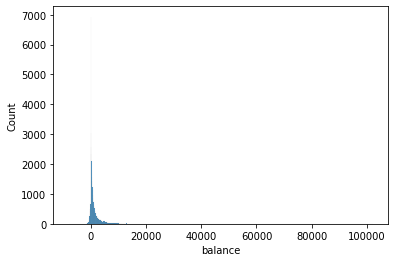

In [30]:
sns.histplot(df.balance)

In [39]:
df['bankclass'] = 'quant1'
df.loc[(df['balance'] > 72) & (df['balance']< 448) , 'bankclass'] = 'quant2' 
df.loc[(df['balance'] > 448) & (df['balance']< 1428) , 'bankclass'] = 'quant3' 
df.loc[(df['balance']> 1428) , 'bankclass'] = 'quant4' 

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bankclass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,quant1


In [40]:
df['bankclass'].value_counts()

quant1    11340
quant3    11299
quant4    11297
quant2    11275
Name: bankclass, dtype: int64

In [44]:
balanceyes= df.groupby(['bankclass'])['y'].agg(balanceyes='count').reset_index()

In [45]:
balanceyes

,bankclass,balanceyes
0,quant1,11340
1,quant2,11275
2,quant3,11299
3,quant4,11297


In [47]:
from sklearn import preprocessing

In [48]:
x= df[['balance']].values.astype(float)

In [49]:
minmaxscaler= preprocessing.MinMaxScaler()

In [50]:
df['balancetran'] = minmaxscaler.fit_transform(x)

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bankclass,balancetran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,quant1,0.072812


In [54]:
df['loantran'] = 1
df.loc[df['y'] == 'no' , 'loantran'] = 5

In [55]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bankclass,balancetran,loantran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,quant4,0.092259,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,quant1,0.073067,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,quant1,0.072822,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,quant4,0.086476,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,quant1,0.072812,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,quant3,0.080293,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,quant4,0.088501,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,quant4,0.124689,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,quant3,0.078868,5


In [57]:
df['loantran'].value_counts()

5    39922
1     5289
Name: loantran, dtype: int64

In [58]:
print(df.dtypes)

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
bankclass       object
balancetran    float64
loantran         int64
dtype: object


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.000000,39.000000,48.000000,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.000000,448.000000,1428.000000,102127.0
day,45211.0,15.806419,8.322476,1.0,8.000000,16.000000,21.000000,31.0
duration,45211.0,258.163080,257.527812,0.0,103.000000,180.000000,319.000000,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.000000,2.000000,3.000000,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.000000,-1.000000,-1.000000,871.0
previous,45211.0,0.580323,2.303441,0.0,0.000000,0.000000,0.000000,275.0
balancetran,45211.0,0.085171,0.027643,0.0,0.073457,0.076871,0.085768,1.0
loantran,45211.0,4.532061,1.285623,1.0,5.000000,5.000000,5.000000,5.0


In [62]:
dfnumeric = df[['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']]

In [63]:
dfnumericcorr= dfnumeric.corr()

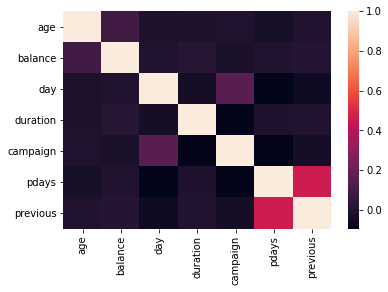

In [65]:
sns.heatmap(dfnumericcorr)

In [66]:
dfnumericcorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [68]:
dfnumeric.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


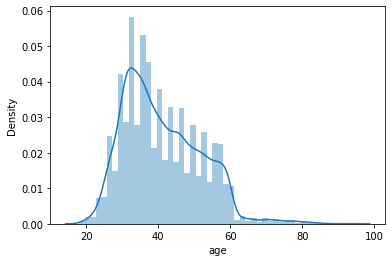

In [69]:
sns.distplot(dfnumeric['age'] )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


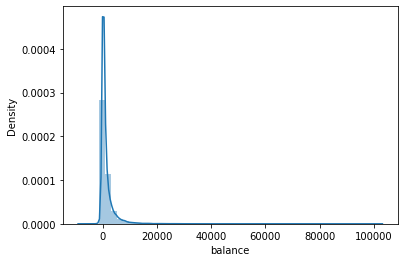

In [70]:
sns.distplot(dfnumeric['balance'])

In [72]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler().fit(dfnumeric)
rescale= scaling.transform(dfnumeric)

In [74]:
rescale

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857,  0.52836436,  0.14341818, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [78]:
 from sklearn.linear_model import LogisticRegression 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
bankclass       object
balancetran    float64
loantran         int64
dtype: object

In [82]:
dfcat= pd.get_dummies(df[['job','marital','education','default','housing','loan','contact','month','poutcome']])

In [84]:
dfcat.shape

(45211, 44)

In [85]:
dfnumeric.shape

(45211, 7)

In [88]:
x= pd.concat([dfcat, dfnumeric] , axis=1)
print(x.shape)

(45211, 51)


In [89]:
y= df['y']
print(y.shape)

(45211,)


In [90]:
x.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [91]:
x_train, x_test, y_train , y_test= train_test_split(x,y, test_size=0.3, random_state=123)

In [92]:
model= LogisticRegression()
model.fit(x_train, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred= model.predict(x_test)

In [94]:
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [96]:
dfnew= pd.DataFrame(pred)

In [97]:
dfnew

,0
0,no
1,no
2,no
3,no
4,no
...,...
13559,no
13560,no
13561,no
13562,no


In [98]:
dfnew.value_counts()

no     12996
yes      568
dtype: int64

In [99]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [100]:
print(model.score(x_test, y_test))

0.8904452963727514


In [101]:
from sklearn.metrics import confusion_matrix
confusionmatrix= confusion_matrix(y_test, pred)
print(confusionmatrix)

[[11754   244]
 [ 1242   324]]


In [102]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))


              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

